In [69]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [70]:
df_Vie = df[df['job_country'] == 'Vietnam'].copy()

In [71]:
df_Vie['job_posted_month'] = df_Vie['job_posted_date'].dt.strftime('%B')

df_Vie

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1203,Data Engineer,"Expert, Data Engineering (40000062)","Hanoi, Hoàn Kiếm, Hanoi, Vietnam",via LinkedIn Vietnam,Full-time,False,Vietnam,2023-03-13 13:29:11,False,False,Vietnam,None,NaN,NaN,Techcombank (TCB),"['sql', 'nosql', 'python', 'r', 'scala', 'java...","{'analyst_tools': ['tableau'], 'libraries': ['...",March
2942,Cloud Engineer,Cyber Security Engineer,Anywhere,via Jobgether,Full-time,True,Vietnam,2023-08-27 13:20:43,True,False,Vietnam,None,NaN,NaN,Go1,"['python', 'bash', 'powershell', 'aws', 'azure...","{'cloud': ['aws', 'azure'], 'other': ['git', '...",August
3016,Data Scientist,CI/XAB - Big data Hadoop developer,Vietnam,via Ai-Jobs.net,Full-time,False,Vietnam,2023-01-06 13:45:37,False,False,Vietnam,year,50400.0,NaN,Bosch Group,"['java', 'hadoop', 'spark', 'unix', 'sap', 'ya...","{'analyst_tools': ['sap'], 'libraries': ['hado...",January
3056,Data Analyst,Chuyên Viên Phân Tích Dữ Liệu (Data Analyst),Vietnam,via Glints,Full-time,False,Vietnam,2023-10-18 13:29:13,True,False,Vietnam,None,NaN,NaN,Công ty Cổ phần Dịch vụ Giao Hàng Nhanh,"['sql', 'python', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",October
3541,Data Engineer,Data Engineer,"Da Nang, Hải Châu District, Da Nang, Vietnam",via Jobs.vn.indeed.com,Full-time and Part-time,False,Vietnam,2023-11-22 13:59:18,False,False,Vietnam,None,NaN,NaN,Vinova Pte. Ltd,"['bash', 'python', 'java', 'sql', 'postgresql'...","{'databases': ['postgresql', 'mysql', 'elastic...",November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785253,Senior Data Analyst,Senior Data Analyst,"Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-11-27 06:47:04,False,False,Vietnam,None,NaN,NaN,MSC Vietnam,"['sql', 'java', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",November
785380,Software Engineer,"Mlops Engineer Python, Linux","Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:18,False,False,Vietnam,None,NaN,NaN,Trusting Social,"['python', 'c++', 'java', 'javascript', 'tenso...","{'libraries': ['tensorflow', 'pytorch', 'mxnet...",December
785382,Data Analyst,Data Analyst,"Hanoi, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:14,True,False,Vietnam,None,NaN,NaN,Sutrix Solutions,"['sql', 'db2', 'oracle', 'aws', 'jira', 'confl...","{'async': ['jira', 'confluence'], 'cloud': ['o...",December
785607,Cloud Engineer,Cloud Services Solutions Engineer,"Hanoi, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-01 06:30:51,False,False,Vietnam,None,NaN,NaN,Tek Experts,"['azure', 'aws', 'oracle', 'windows', 'linux']","{'cloud': ['azure', 'aws', 'oracle'], 'os': ['...",December


In [72]:
df_Vie_pivot = df_Vie.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [65]:
df_Vie_pivot.reset_index(inplace=True)
df_Vie_pivot['month_no'] = pd.to_datetime(df_Vie_pivot['job_posted_month'], format='%B').dt.month

df_Vie_pivot.sort_values('month_no', inplace=True)
df_Vie_pivot.set_index('job_posted_month', inplace=True)
df_Vie_pivot.drop(columns='month_no', inplace=True)

In [74]:
df_Vie_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,6.0,3.0,22.0,58.0,25.0,5.0,4.0,17.0,6.0,23.0
August,4.0,4.0,12.0,61.0,29.0,7.0,5.0,17.0,6.0,9.0
December,8.0,6.0,26.0,71.0,26.0,14.0,7.0,14.0,16.0,28.0
February,4.0,2.0,25.0,33.0,25.0,9.0,6.0,15.0,8.0,8.0
January,9.0,4.0,43.0,61.0,33.0,5.0,7.0,21.0,11.0,22.0
July,3.0,NaN,24.0,52.0,19.0,5.0,8.0,11.0,4.0,9.0
June,7.0,1.0,24.0,60.0,16.0,14.0,8.0,16.0,6.0,13.0
March,5.0,2.0,26.0,44.0,25.0,4.0,4.0,17.0,4.0,13.0
May,3.0,2.0,17.0,38.0,19.0,11.0,3.0,12.0,2.0,4.0


In [78]:
top_3 = df_Vie['job_title_short'].value_counts().head(3)

top_3 = top_3.index.tolist()

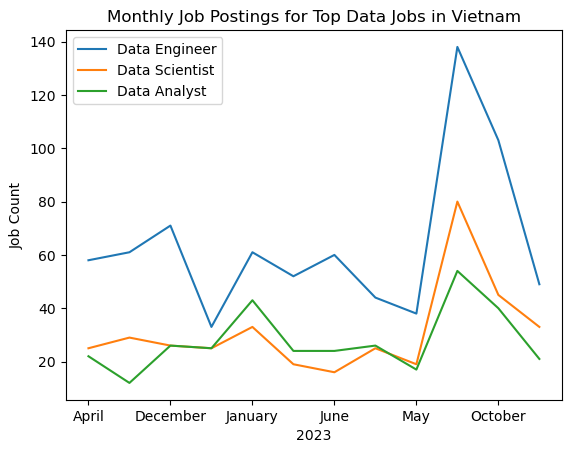

In [80]:
df_Vie_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in Vietnam')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()